In [2]:
# Imports
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
# Load your merged dataset into a Pandas DataFrame
# Replace 'merged_data.csv' with the actual file path or URL of your dataset
merged_data = pd.read_csv('./CleanData/Set1/MergedDataSet1.csv')
print(merged_data)

      UnixTimeStampInMsec  Latitude  Longitude  Speed  TrackAngle    AccelX  \
0           1681948874000   58.3146    15.1299  21.20      347.07 -0.573406   
1           1681948901000   58.3172    15.1298  20.07       10.80 -0.127915   
2           1681948902000   58.3173    15.1299  20.06        9.09  0.079722   
3           1681948903000   58.3174    15.1299  20.04        9.56  0.004140   
4           1681949033000   58.3293    15.1402  25.11       55.96 -0.905503   
...                   ...       ...        ...    ...         ...       ...   
1606        1682027627000   59.5636    17.8828   0.20       88.45  0.065887   
1607        1682027689000   59.5635    17.8830   1.20      357.89  0.064309   
1608        1682027726000   59.5635    17.8825   0.52       21.95  0.065793   
1609        1682027727000   59.5635    17.8825   0.86      157.92  0.071651   
1610        1682027898000   59.5635    17.8822   0.19       46.51  0.068886   

        AccelY     AccelZ     GyroX     GyroY     G

In [4]:
# Define the state transition matrix (A) and observation matrix (H) for Latitude and Longitude
A = np.eye(2)  # Identity matrix for position tracking
H = np.array([[1, 0], [0, 1]])  # Observation matrix for Latitude and Longitude

# Initialize the Kalman Filter
kf = KalmanFilter(
    initial_state_mean=merged_data[['Latitude', 'Longitude']].iloc[0],  # Initial position
    initial_state_covariance=np.eye(2),  # Initial covariance matrix
    transition_matrices=A,
    observation_matrices=H
)

# Apply the Kalman Filter to the dataset
filtered_state_means, _ = kf.filter(merged_data[['Latitude', 'Longitude']].values)

# Update the Latitude and Longitude columns in the DataFrame with the filtered values
merged_data['Latitude'] = filtered_state_means[:, 0]
merged_data['Longitude'] = filtered_state_means[:, 1]

merged_and_filtered_data = merged_data
print(merged_and_filtered_data)


      UnixTimeStampInMsec   Latitude  Longitude  Speed  TrackAngle    AccelX  \
0           1681948874000  58.314600  15.129900  21.20      347.07 -0.573406   
1           1681948901000  58.316160  15.129840  20.07       10.80 -0.127915   
2           1681948902000  58.316862  15.129877  20.06        9.09  0.079722   
3           1681948903000  58.317194  15.129891  20.04        9.56  0.004140   
4           1681949033000  58.324675  15.136262  25.11       55.96 -0.905503   
...                   ...        ...        ...    ...         ...       ...   
1606        1682027627000  59.563599  17.882795   0.20       88.45  0.065887   
1607        1682027689000  59.563538  17.882922   1.20      357.89  0.064309   
1608        1682027726000  59.563514  17.882661   0.52       21.95  0.065793   
1609        1682027727000  59.563506  17.882562   0.86      157.92  0.071651   
1610        1682027898000  59.563502  17.882338   0.19       46.51  0.068886   

        AccelY     AccelZ     GyroX    

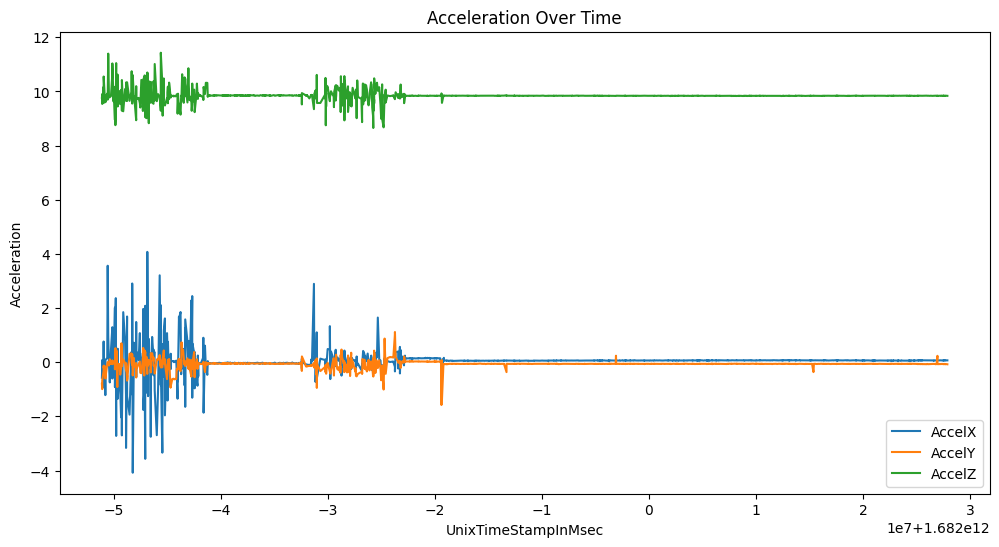

In [5]:

# Data Visualization
# Plot time series data of shock and GPS parameters
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelX'], label='AccelX')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelY'], label='AccelY')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelZ'], label='AccelZ')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Acceleration')
plt.title('Acceleration Over Time')
plt.legend()
plt.show()


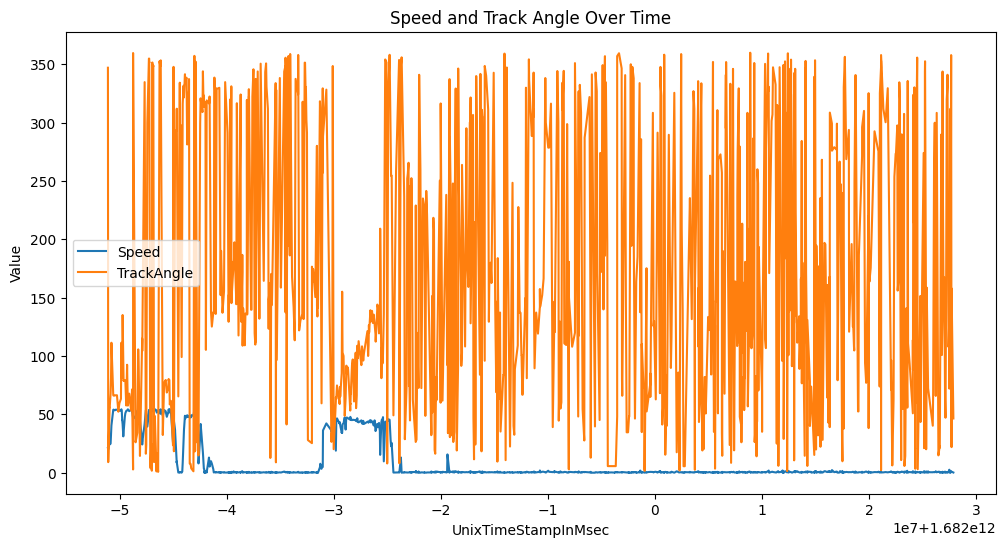

In [6]:
# Plot speed and track angle
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['Speed'], label='Speed')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['TrackAngle'], label='TrackAngle')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Value')
plt.title('Speed and Track Angle Over Time')
plt.legend()
plt.show()

#### Speed Trends Over Time: The plot shows how the speed of the vehicle changes as time progresses. You can observe fluctuations and trends in the speed data. For example, you can identify periods of acceleration, deceleration, or constant speed. Sudden spikes or drops in speed may also be noticeable.

#### Track Angle Changes: The track angle represents the direction in which the vehicle is moving. By plotting track angle over time, you can visualize how the vehicle's direction changes during the recorded period. Steady and consistent track angles may indicate that the vehicle is moving in a relatively straight path, while frequent changes in track angle suggest the vehicle is changing its direction frequently, perhaps due to turns or maneuvers.

#### Correlation Between Speed and Track Angle: You can assess whether there is any correlation or relationship between speed and track angle changes. For example, you might notice that speed tends to decrease when the track angle changes sharply, which could indicate the vehicle slowing down before a turn.

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

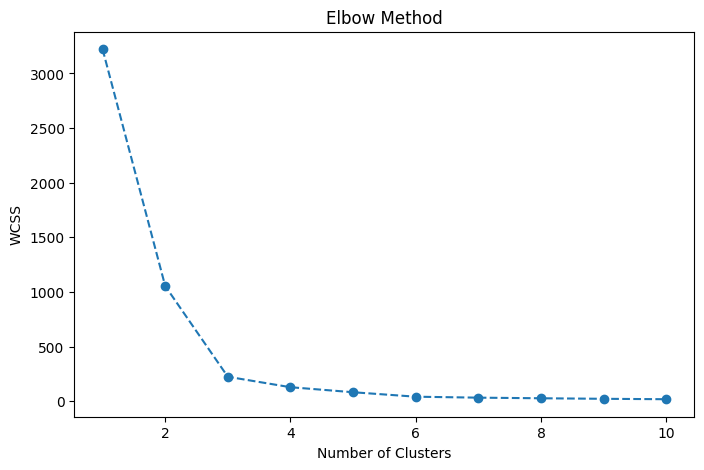

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


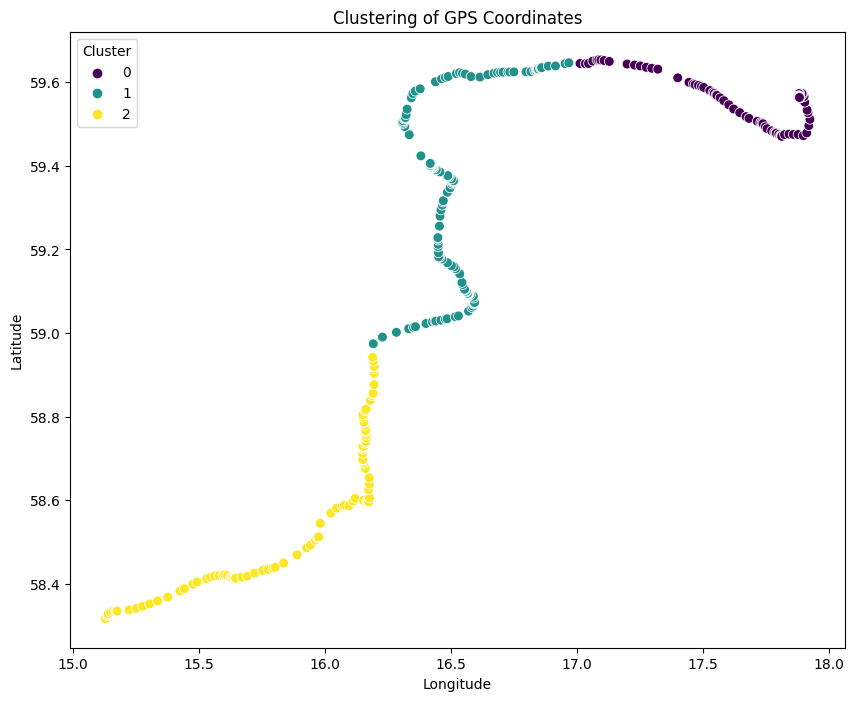

In [7]:
# Perform K-means clustering on data (Latitude and Longitude)
clustered_data = merged_and_filtered_data[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
merged_gps_data_scaled = scaler.fit_transform(clustered_data)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(merged_gps_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters and fit the K-means model
num_clusters = 3  # You can adjust this based on the Elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
merged_and_filtered_data['Cluster'] = kmeans.fit_predict(merged_gps_data_scaled)

# Visualize the clusters on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=merged_and_filtered_data, palette='viridis', s=50)
plt.title('Clustering of GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### WCSS (Within-Cluster Sum of Squares): WCSS is a measure of the variability or dispersion of data points within the clusters in a K-means clustering model. It quantifies how far each data point within a cluster is from the centroid (center) of that cluster. Specifically, it calculates the sum of the squared distances between each data point and the centroid of the cluster to which it belongs.

#### Elbow Method: The Elbow Method is a heuristic used to determine the optimal number of clusters (K) for a K-means clustering algorithm. The idea is to plot the WCSS values for different values of K (typically ranging from 1 to some maximum value) and observe how the WCSS changes as K increases. The name "Elbow" comes from the shape of the plot, which often resembles an elbow.

##### Note: As K increases, the WCSS typically decreases because each data point is closer to its cluster centroid in a smaller cluster. However, after a certain point, increasing K further does not result in a significant reduction in WCSS. The rate of decrease in WCSS starts to slow down.

#### Number of Clusters: The Elbow Method is used to determine the optimal number of clusters. In your code, you've chosen num_clusters = 3. This means that the data has been grouped into three distinct clusters based on spatial proximity.

#### Cluster Locations: The scatterplot on the map shows the location of each data point (latitude and longitude) colored by the cluster to which it belongs. This visualization allows you to see how the data points are spatially distributed within each cluster.

#### Spatial Patterns: By examining the clusters on the map, you can identify spatial patterns or groupings in your data. Data points within the same cluster are likely to be geographically closer to each other compared to points in different clusters. This could indicate that certain regions or areas have similar GPS coordinates.